still variance in training... ?
Mean Absolute Percentage Error
n is the number of patients
At is the actual value
Ft is the forecast value


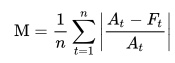

In [50]:
from IPython.display import Image
print("still variance in training... ?")
print("Mean Absolute Percentage Error")
print("n is the number of patients")
print("At is the actual value")
print("Ft is the forecast value")

Image("mape.jpeg")

STraTSBERT_4
min train loss: 0.0504991424822616
min val loss: 0.0463067889213562


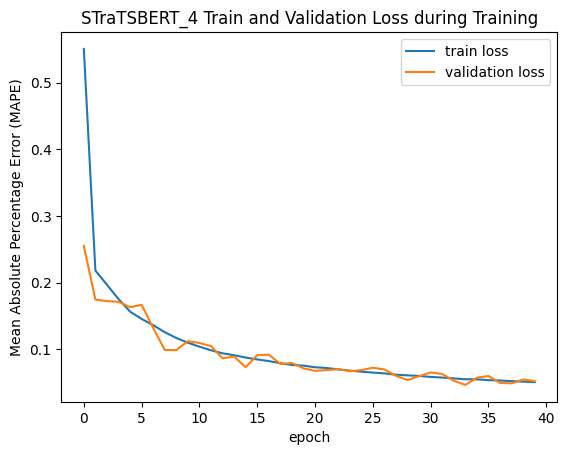

STraTSBERT
min train loss: 0.0562306696937545
min val loss: 0.0526362806558609


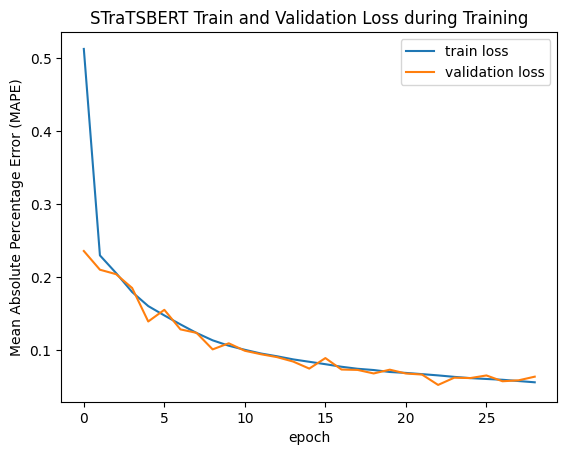

STraTS
min train loss: 0.0636292828011283
min val loss: 0.0548356994986534


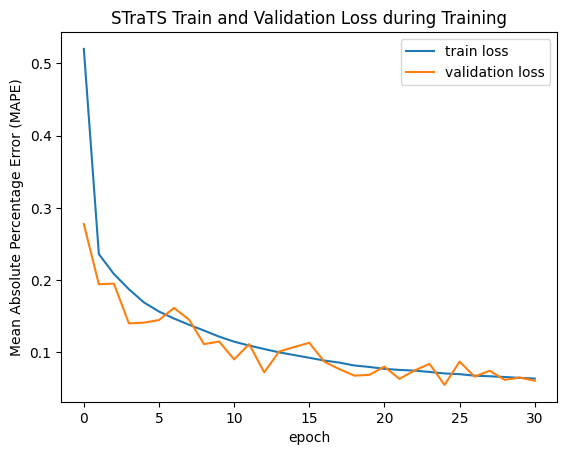

tfidfSTraTS
min train loss: 0.0559706570928903
min val loss: 0.058003194630146


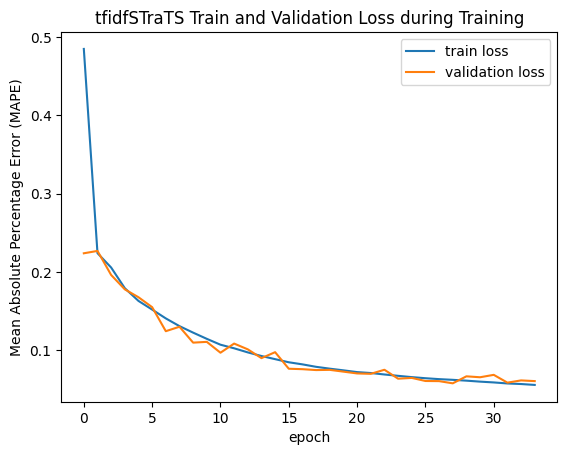

In [49]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Set your path to the folder containing the .csv files
PATH = './Experiments/train_losses/' # Use your path

### Fetch all files in path
fileNames = os.listdir(PATH)

### Filter file name list for files ending with .csv
fileNames = [file for file in fileNames if '.csv' in file]

### Loop over all files
for file in fileNames:

    ### Read .csv file and append to list
    df = pd.read_csv(PATH + file, index_col = 0)
    name = file[7:-35]
    ### Create line for every file
    print(name)
    print("min train loss:",min(df["train_loss"]))
    print("min val loss:",min(df["val_loss"]))

    plt.plot(df)
    plt.title(f"{name} Train and Validation Loss during Training")
    plt.xlabel("epoch")
    plt.ylabel("Mean Absolute Percentage Error (MAPE)")
    plt.legend(['train loss','validation loss'],loc='upper right') 
    plt.show()
### Generate the plot


In [13]:
similarity_df = pd.read_pickle("sBert+tfidf+labels.pkl")

In [14]:
similarity_df

,granular_label,sepsis_label,sBertEnb,tfidf
0,0,0.0,"[-0.51714474, 0.21302418, 0.020507023, -0.1304...","[0.0, 0.0, 0.05146154007339281, 0.0, 0.0, 0.0,..."
1,0,0.0,"[-0.4679238, 0.3116593, 0.2744373, 0.26359615,...","[0.0, 0.30094437341268465, 0.0, 0.0, 0.0, 0.26..."
2,0,0.0,"[-0.55922073, 0.29648715, 0.120023295, 0.15468...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.25660652998802147,..."
3,0,0.0,"[-0.5344356, 0.29884213, 0.15910387, 0.1581697...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.12206578650122021,..."
4,0,0.0,"[-0.5435188, 0.30664456, 0.15043513, 0.1473352...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.09229845896629237,..."
...,...,...,...,...
1311535,0,0.0,"[-0.50256765, -0.28098354, 0.21772005, 0.16070...","[0.15489775131476796, 0.12963786623230006, 0.2..."
1311536,0,0.0,"[-0.44923645, -0.2792246, 0.13879944, 0.148683...","[0.24033451845687037, 0.20114206881804844, 0.3..."
1311537,0,0.0,"[-0.5062678, -0.23393238, 0.27889442, -0.01908...","[0.0, 0.0, 0.0, 0.0, 0.018027707824725334, 0.0..."
1311538,0,0.0,"[0.43901977, 0.022834163, 0.06674186, 0.055706...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [31]:
from sklearn.metrics.pairwise import cosine_similarity
sample = similarity_df.sample(n=1000, random_state=1)

X = sample["sBertEnb"].loc[similarity_df["sepsis_label"]==0]
Y = sample["sBertEnb"].loc[similarity_df["sepsis_label"]==1]
X_ = sample["tfidf"].loc[similarity_df["sepsis_label"]==0]
Y_ = sample["tfidf"].loc[similarity_df["sepsis_label"]==1]


from scipy.spatial.distance import pdist

sample["Average_s_Bert_Similarity"] = sample.groupby("sepsis_label")["sBertEnb"].transform(
    lambda group: pdist(group.to_list(), metric="cosine").mean()
)
sample["Average_tfidf_Similarity"] = sample.groupby("sepsis_label")["tfidf"].transform(
    lambda group: pdist(group.to_list(), metric="cosine").mean()
)
sample[["sepsis_label","Average_s_Bert_Similarity","Average_tfidf_Similarity"]]



,sepsis_label,Average_s_Bert_Similarity,Average_tfidf_Similarity
399673,0.0,0.550954,NaN
927112,1.0,0.514222,NaN
897236,1.0,0.514222,NaN
750139,0.0,0.550954,NaN
131313,0.0,0.550954,NaN
...,...,...,...
856172,1.0,0.514222,NaN
1150586,0.0,0.550954,NaN
1308007,1.0,0.514222,NaN
348004,0.0,0.550954,NaN


In [17]:
X_

291262     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1178565    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
32240      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3366466243226...
188236     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
73380      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.41792075...
                                 ...                        
710688     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
631377     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
376023     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3334777061658...
951063     [0.0, 0.05232953569631914, 0.04775412083101475...
447084     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: tfidf, Length: 418, dtype: object

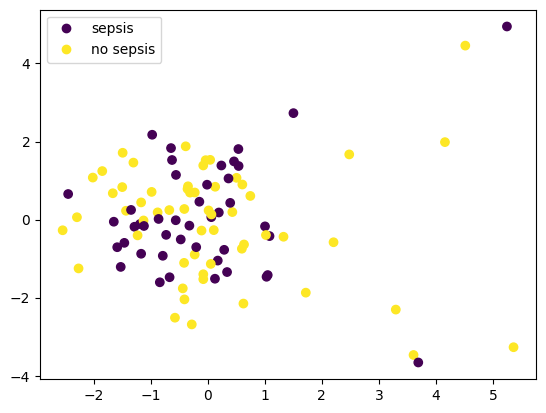

In [4]:
sample = similarity_df.sample(100, random_state=10110)
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
y = list(sample["sepsis_label"].values)
x = sample["sBertEnb"]
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(list(x))
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=["sepsis", "no sepsis"])
plt.show()


In [6]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report as report
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text


In [7]:
noteevents = pd.read_csv("noteevents_preprocessed_text_granular_label.csv")

In [8]:
noteevents.dropna(subset=['clean_text'], inplace=True)
text_ = noteevents["clean_text"]
text_targets = noteevents[["sepsis_label", "granular_label"]]
X_train, X_test, y_train, y_test = train_test_split(text_, text_targets.sepsis_label, test_size=0.30, random_state=100,stratify=text_targets.sepsis_label)
print(f"Shape of X_train: {len(X_train)}")
print(f"Shape of X_test: {len(X_test)}")
print("Class Balance in Training Data:", Counter(y_train).items())
print("Class Balance in Test Data:", Counter(y_test).items())
my_words = ["______________________________________________________________________________", "sepsis", "septic"]
my_stop_words = text.ENGLISH_STOP_WORDS.union(my_words)
clf = Pipeline([
    ("vct", TfidfVectorizer(analyzer="word", stop_words=list(set(my_stop_words)),  max_features=50, max_df=0.7, min_df=3, strip_accents='ascii')),
    ("sparse2dense", FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
    ("forest", RandomForestClassifier(random_state=1, n_jobs=-2, verbose=1))
])

Shape of X_train: 918019
Shape of X_test: 393437
Class Balance in Training Data: dict_items([(0.0, 367900), (1.0, 550119)])
Class Balance in Test Data: dict_items([(0.0, 157672), (1.0, 235765)])


In [9]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(report(y_test, y_pred))

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    1.8s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    4.5s finished


              precision    recall  f1-score   support

         0.0       0.60      0.52      0.56    157672
         1.0       0.70      0.77      0.73    235765

    accuracy                           0.67    393437
   macro avg       0.65      0.64      0.64    393437
weighted avg       0.66      0.67      0.66    393437



In [10]:
x = clf.named_steps["vct"].transform(noteevents["clean_text"]).toarray()
x

array([[0.        , 0.        , 0.05146154, ..., 0.        , 0.        ,
        0.04786967],
       [0.        , 0.30094437, 0.        , ..., 0.        , 0.        ,
        0.12773145],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.12578319],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01651354],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [11]:
similarity_df["tfidf"] = list(x)
similarity_df

,granular_label,sepsis_label,sBertEnb,tfidf
0,0,0.0,"[-0.51714474, 0.21302418, 0.020507023, -0.1304...","[0.0, 0.0, 0.05146154007339281, 0.0, 0.0, 0.0,..."
1,0,0.0,"[-0.4679238, 0.3116593, 0.2744373, 0.26359615,...","[0.0, 0.30094437341268465, 0.0, 0.0, 0.0, 0.26..."
2,0,0.0,"[-0.55922073, 0.29648715, 0.120023295, 0.15468...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.25660652998802147,..."
3,0,0.0,"[-0.5344356, 0.29884213, 0.15910387, 0.1581697...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.12206578650122021,..."
4,0,0.0,"[-0.5435188, 0.30664456, 0.15043513, 0.1473352...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.09229845896629237,..."
...,...,...,...,...
1311535,0,0.0,"[-0.50256765, -0.28098354, 0.21772005, 0.16070...","[0.15489775131476796, 0.12963786623230006, 0.2..."
1311536,0,0.0,"[-0.44923645, -0.2792246, 0.13879944, 0.148683...","[0.24033451845687037, 0.20114206881804844, 0.3..."
1311537,0,0.0,"[-0.5062678, -0.23393238, 0.27889442, -0.01908...","[0.0, 0.0, 0.0, 0.0, 0.018027707824725334, 0.0..."
1311538,0,0.0,"[0.43901977, 0.022834163, 0.06674186, 0.055706...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [12]:
#similarity_df.to_pickle("sBert+tfidf+labels.pkl")

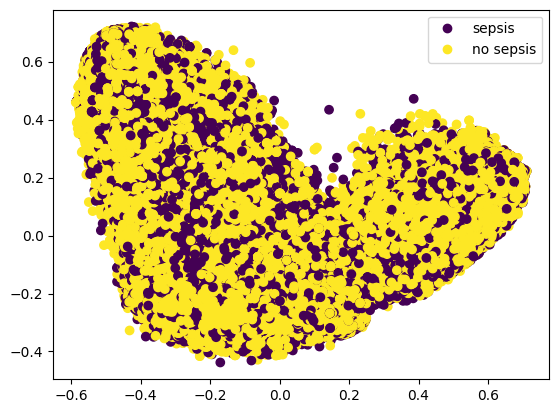

In [24]:
#sample = similarity_df.sample(1000, random_state=10110)
sample = similarity_df.copy()
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
y = list(sample["sepsis_label"].values)
x = sample["tfidf"]
pca = PCA()
pipe = Pipeline([ ('pca', pca)])
Xt = pipe.fit_transform(list(x))
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=["sepsis", "no sepsis"])
plt.show()


In [4]:
from sklearn.metrics.pairwise import cosine_similarity
sample = similarity_df.sample(n=1000, random_state=100)
X = sample["tfidf"].loc[similarity_df["sepsis_label"]==0]
Y = sample["tfidf"].loc[similarity_df["sepsis_label"]==1]

cosine_similarity(list(X), list(Y))

KeyError: 'tfidf'